# Seasonality modeling

https://www.youtube.com/watch?v=nT6UsVgJ0xw

In [1]:
import pathlib
import pandas as pd
import numpy as np

In [38]:
from sklearn.linear_model import LinearRegression

## Get data

In [11]:
data_file_name =  pathlib.Path('..') / '..' / 'download_data_dir' / 'air_quality.csv'

In [14]:
data_file_name.exists()

True

In [24]:
air_df = pd.read_csv(data_file_name, index_col='date_local', parse_dates=True)

In [25]:
air_df.shape

(3562, 1)

In [26]:
air_df.head()

,aqi
date_local,
2007-08-01,5.522124
2007-08-02,5.894895
2007-08-03,5.928358
2007-08-04,5.792285
2007-08-05,5.744807


## Plot

<AxesSubplot:xlabel='date_local'>

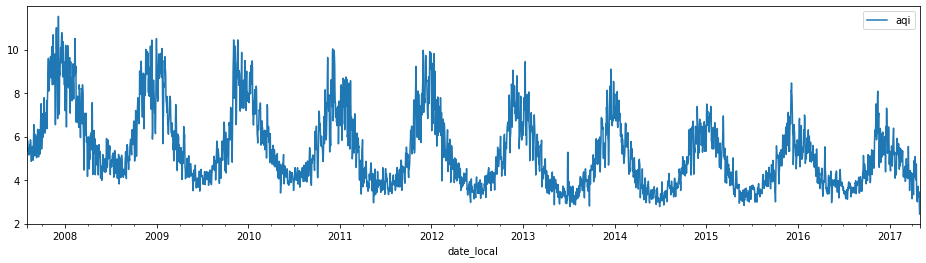

In [27]:
air_df.plot(figsize=(16, 4))

<AxesSubplot:xlabel='date_local'>

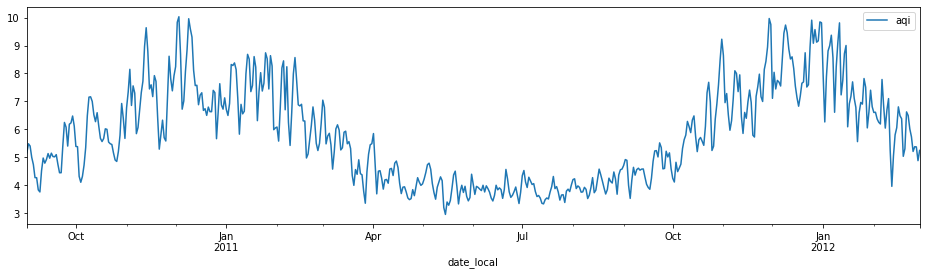

In [29]:
air_df['2010-09':'2012-02'].plot(figsize=(16, 4))

## Dealing with seasonality

<AxesSubplot:xlabel='date_local'>

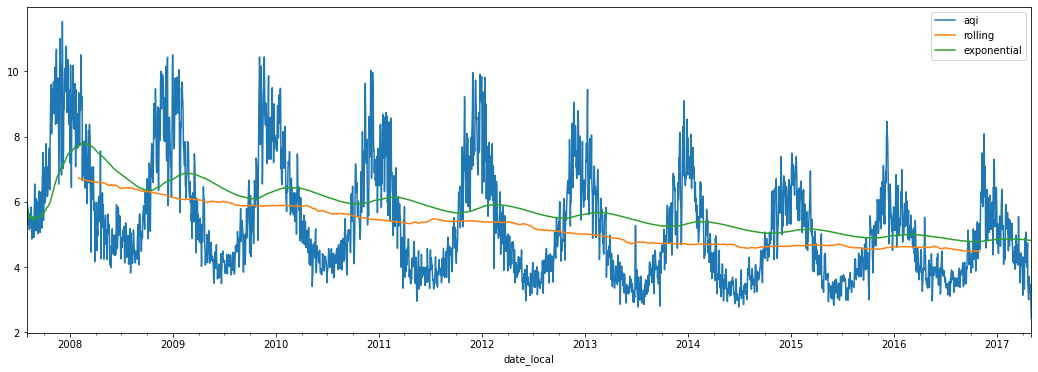

In [30]:
air_df.assign(
    rolling=lambda df: df.aqi.rolling(365, center=True).mean(),
    exponential=lambda df:df.aqi.ewm(alpha=0.001).mean()
).plot(figsize=(18, 6))

<AxesSubplot:xlabel='date_local'>

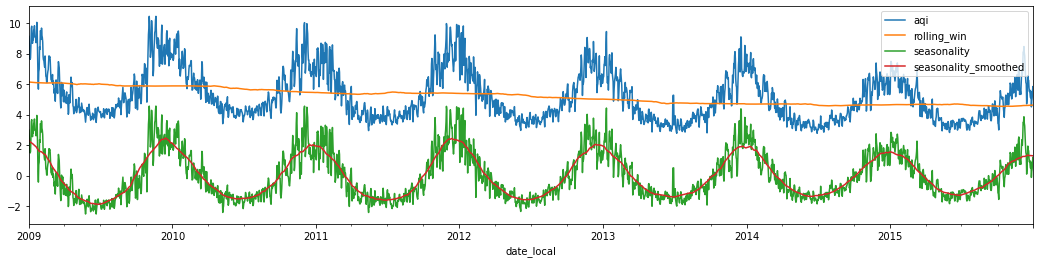

In [35]:
air_df.assign(
    rolling_win=lambda df: df.aqi.rolling(365, center=True).mean(),
    seasonality=lambda df: df.aqi - df.rolling_win,
    seasonality_smoothed=lambda df: df.seasonality.rolling(90, center=True).mean()
).loc['2009':'2015'].plot(figsize=(18, 4))

## Linear modeling approach

In [63]:
air_df = pd.read_csv(data_file_name, index_col='date_local', parse_dates=True)

In [64]:
air_df['time'] = np.arange(len(air_df.index))

In [58]:
X = air_df[['time']]
y = air_df.aqi.values

In [59]:
lm = LinearRegression()
lm.fit(X, y)
air_df['linear_trend'] = lm.predict(X)

<AxesSubplot:xlabel='date_local'>

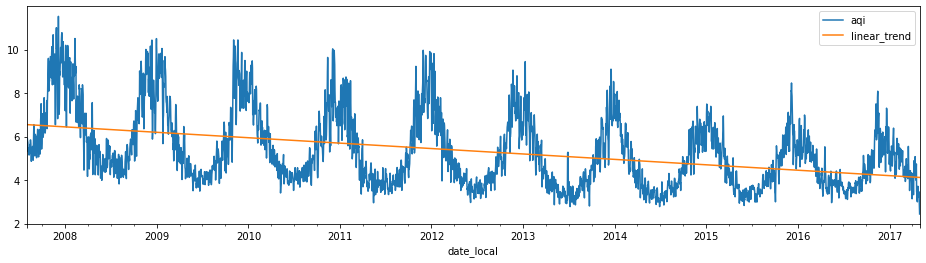

In [60]:
air_df[['aqi', 'linear_trend']].plot(figsize=(16, 4))

### Break in trend

In [114]:
air_df = pd.read_csv(data_file_name, index_col='date_local', parse_dates=True)

In [115]:
air_df['time'] = np.arange(len(air_df.index))

In [117]:
X_break = air_df.assign(
    after2014=[1 if el > pd.Timestamp('2014-6') else 0 for el in air_df.index],
    interaction=lambda df: df['time'] * df['after2014']
)[['time', 'after2014', 'interaction']]

In [118]:
lm_break = LinearRegression().fit(X_break, y)
air_df['linear_trend_break'] = lm_break.predict(X_break)

<AxesSubplot:xlabel='date_local'>

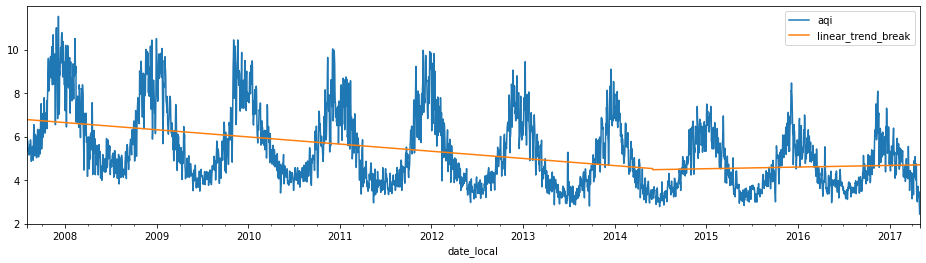

In [121]:
air_df[['aqi', 'linear_trend_break']].plot(figsize=(16, 4))